In [8]:
import cv2
import numpy as np
im=np.load('D:\\new_np\\ABS\\ABS_M02_RF070.npy')

img=im[0,:,:]
img = cv2.GaussianBlur(img, (3, 3), 0)
scale=3
width=int(img.shape[0]*scale)
height=int(img.shape[1]*scale)
dim=(width,height)
img_resized=cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
#canny=cv2.Canny(img,125,175)
cv2.imshow('Original',img)

cv2.imshow('Resized',img_resized)
# cv2.imshow('Canny Edges',canny)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

In [1]:
import numpy as np

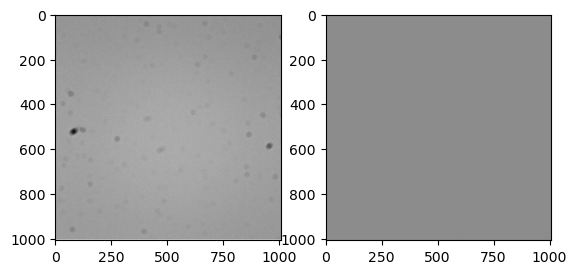

In [46]:
from scipy import ndimage
import matplotlib.pyplot as plt

img = np.load('D:\\numpy_files\\ABS\\ABS_M01_RF070.npy')
im = img[0,:,:]
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.laplace(im)
ax1.imshow(im)
ax2.imshow(result)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os


# def normalize(polymer,exposure_time):
#     list=os.listdir(polymer)             
#     for i in list:                        
#         img=np.load(polymer+i)
#         normalized_int=img[0,:,:]
#         int_diff= img[1,:,:]
#         updated=normalized_int*2000/int(exposure_time)
#         final_np=np.array([updated ,int_diff])
#         #np.save(location+src_dir +'/'+i,final_np)                
#     print('Noramalization of {} has been completed'.format(src_dir))
# # TODO: overwrite the file, change 'D:/new_np/' to location
# s=input('Enter polymer and exposure time: ')  
# location ='D:/new_np/'                                            #D:/numpy_files/
# src_dir=s.split(' ')[0]                                                #ABS
# polymer = location+src_dir+'/'                                         #D:/numpy_files/ABS/
# exposure_time= s.split(' ')[1]                                          #800
# normalize(polymer,exposure_time)     








def computation(polymer):
    list0=[]
    list1=[]
    list2=[]
    list3=[]
    list4=[]
    list5=[]
    for k in range(1):
        s= input ('enter polymer name and exposure time')
        t= s.split(' ')[0]  #name
        u= s.split(' ')[1]  #exposure time
#     polymer=os.listdir('E:/Rapid-FLIM_Polymer2/')
#     polymer=['ABS','PVC']
#     for j in polymer:
    
        src_dir=os.path.join(f"E:/Rapid-FLIM_Polymer2/{t}/") #E:\Rapid-FLIM_Polymer2
        samples=os.listdir(src_dir)

        for i in samples:
            if i.split('.')[0][-3:]=='070':
                polymer_name=i.split('_RF')[0] #ABS_M01_RF000.npy
                img=np.load(src_dir+i)
                ni=img[0,:,:]
                norm=ni*2000/int(u)
                nd= img[1,:,:]
                nd = cv2.GaussianBlur(nd, (13, 13), 0)
                mean_ni=np.mean(np.abs(norm))
                std_dev_ni=np.std(norm)
                mean_nd=np.mean(np.abs(nd))
                std_dev_nd=np.std(nd)
                list0.append(polymer_name)
                list1.append(mean_ni)
                list2.append(std_dev_ni)
                list3.append(mean_nd)
                list4.append(std_dev_nd)
        list5.append(t)
        print('{} completed'.format(list5))
            
    col0= "polymer"
    col1="mean(ni)"
    col2="standard_deviation(ni)"
    col3="mean(nd)"
    col4="standard_deviation(nd)"
    data=pd.DataFrame({col0:list0,col1:list1,col2:list2,col3:list3,col4:list4})
    data.to_excel("nnn.xlsx",sheet_name="sheet",index=True,header=True)
    print('process complete')
    
# polymer=input('Enter polymer name= ')
computation(polymer)